# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

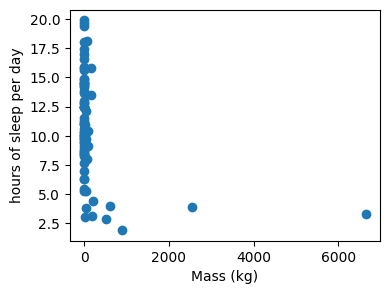

In [2]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [3]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

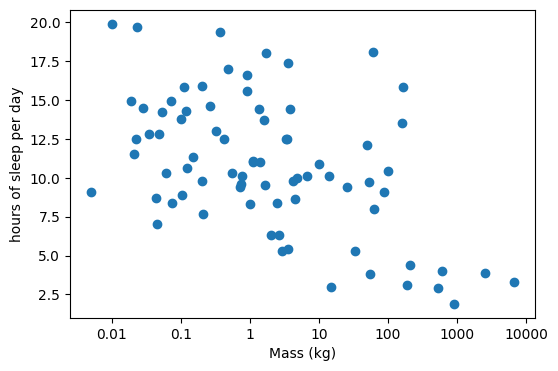

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

LinearModel(Relationship between mass and sleep):
Slope: -1.6149691733776599
Intercept: 11.217396810788516
R-squared: 0.26432361005128435


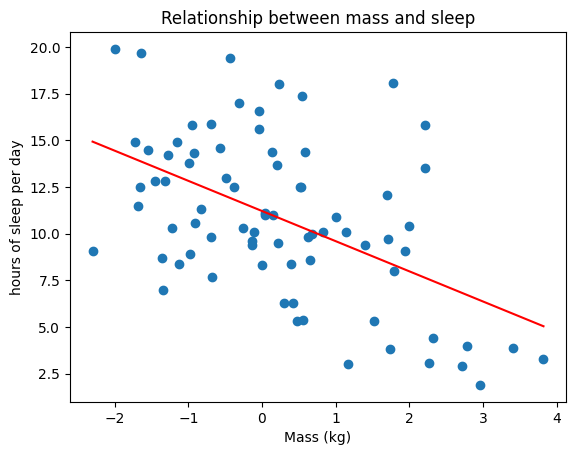

In [ ]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):
x_min = df['log10_mass'].min()
x_max = df['log10_mass'].max()
mass_and_sleep_model = LinearModel('Relationship between mass and sleep')
mass_and_sleep_model.fit(df['log10_mass'], df['sleep'])
mass_and_sleep_model.print_model_info()
mass_and_sleep_model.plot_model(x_min, x_max, color="red")
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
plt.title('Relationship between mass and sleep')
xticks = [-2, -1, 0, 1, 2, 3, 4]







Model Information:
-------------------
Carnivores Model:
LinearModel(Carnivores: Relationship between mass and sleep):
Slope: -0.14090226025203167
Intercept: 12.99704850696372
R-squared: 0.0031865034132742

Omnivores Model:
LinearModel(Omnivores: Relationship between mass and sleep):
Slope: -1.0841960083999438
Intercept: 11.662140158348944
R-squared: 0.10944681716489979

Herbivores Model:
LinearModel(Herbivores: Relationship between mass and sleep):
Slope: -2.2408355966298794
Intercept: 9.596484459635365
R-squared: 0.6255104280867234
-------------------


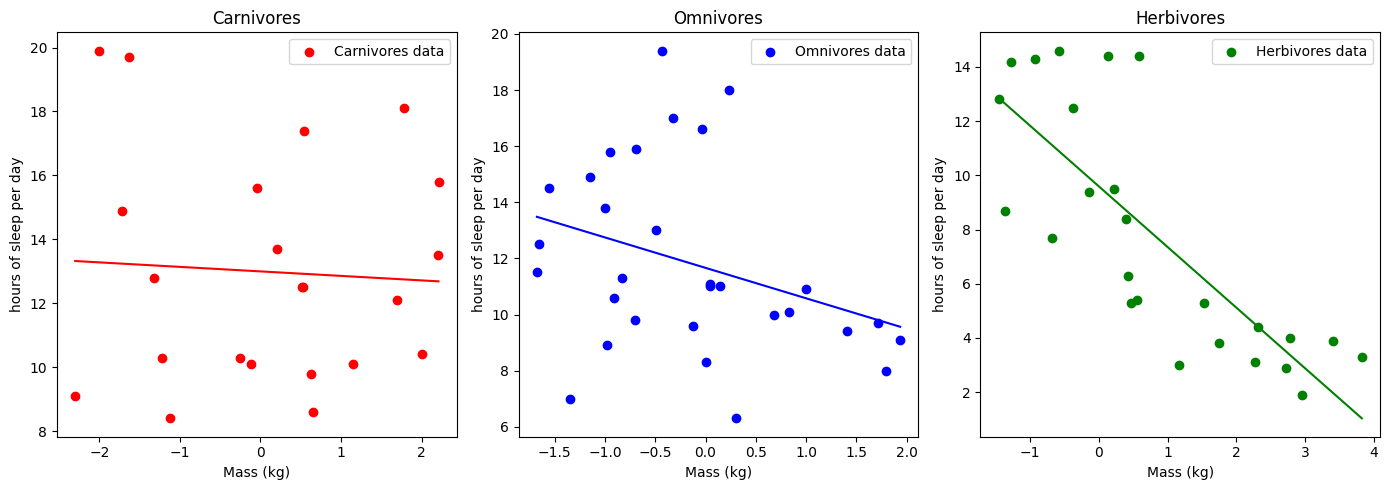

In [24]:
# Obtenin all dataframes for each diet type
carnivores_df = df[df['diet'] == 'carnivore']
omnivores_df = df[df['diet'] == 'omnivore']
herbivores_df = df[df['diet'] == 'herbivore']

# Create and fit a linear model for each diet type
carnivores_model = LinearModel('Carnivores: Relationship between mass and sleep')
omnivores_model = LinearModel('Omnivores: Relationship between mass and sleep')
herbivores_model = LinearModel('Herbivores: Relationship between mass and sleep')

# Fit the models
carnivores_model.fit(carnivores_df['log10_mass'], carnivores_df['sleep'])
omnivores_model.fit(omnivores_df['log10_mass'], omnivores_df['sleep'])
herbivores_model.fit(herbivores_df['log10_mass'], herbivores_df['sleep'])

# Print model info
print("Model Information:")
print("-------------------")
print("Carnivores Model:")
carnivores_model.print_model_info()
print("\nOmnivores Model:")
omnivores_model.print_model_info()
print("\nHerbivores Model:")
herbivores_model.print_model_info()
print("-------------------")


# Plot the models
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.sca(ax[0])
ax[0].scatter(carnivores_df['log10_mass'], carnivores_df['sleep'], color='red', label='Carnivores data')
carnivores_model.plot_model(carnivores_df['log10_mass'].min(), carnivores_df['log10_mass'].max(), color="red")
ax[0].set_title('Carnivores')
ax[0].set_xlabel('Mass (kg)')
ax[0].set_ylabel('hours of sleep per day')
ax[0].legend()

plt.sca(ax[1])
ax[1].scatter(omnivores_df['log10_mass'], omnivores_df['sleep'], color='blue', label='Omnivores data')
omnivores_model.plot_model(omnivores_df['log10_mass'].min(), omnivores_df['log10_mass'].max(), color="blue")
ax[1].set_title('Omnivores')
ax[1].set_xlabel('Mass (kg)')
ax[1].set_ylabel('hours of sleep per day')
ax[1].legend()

plt.sca(ax[2])
ax[2].scatter(herbivores_df['log10_mass'], herbivores_df['sleep'], color='green', label='Herbivores data')
herbivores_model.plot_model(herbivores_df['log10_mass'].min(), herbivores_df['log10_mass'].max(), color="green")
ax[2].set_title('Herbivores')
ax[2].set_xlabel('Mass (kg)')
ax[2].set_ylabel('hours of sleep per day')
ax[2].legend()

plt.tight_layout()
plt.show()
